# Desbalanceamento rotativo

Neste notebook iremos estudar o desbalanceamento em uma máquina rotativa.

Pequenas irregularidades na distribuição da massa dos elementos rotativos podem ocasionar elevados níveis de vibração. Este é o chamado desbalanceamento rotativo. A figura abaixo apresenta um esquema de uma máquina rotativa.

![title](Slide1.png)

Montando o diagrama de corpo livre temos:

![title](Slide2.png)

Somando as forças do rotor (esquerda da figura), temos: 
$m_0(\ddot{x} + \ddot{x_r}) = - F_r$  (1)

Somando as forças na máquina (direita da figura), temos: $(m - m_0)\ddot{x} = F_r - c\dot{x} - kx$  (2)

Combinando as equações:

$m\ddot{x} + m_0\ddot{x_r} + c\dot{x} + kx = 0$  (3)

Assumindo que a máquina tem rotação constante $\omega _r$ temos que $x_r = e\sin(\omega _r t)$ e:

$\ddot{x} _r = -e\omega^2_r\sin(\omega_r t)$  (4)

Substituindo 4 em 3:

$m\ddot{x} + c\dot{x} + kx = m_0e\omega^2_r \sin(\omega_r t)$  (5)

A solução particular é: $x_p(t) = X \sin(\omega_r t - \theta)$. Fazendo $ r = \omega_r / \omega_n$ temos:

\begin{equation}
X = \frac{m_0e}{m} \frac{r^2}{\sqrt{(1-r^2)^2 + 2(\zeta r)^2}} \ \ \ \text{(6)} \\
\theta = \tan^-1 \frac{2\zeta r}{1-r^2} \ \ \ \text{(7)} 
\end{equation}

Com números complexos:

$X = \frac{m_0e}{m} \frac{r^2}{1-r^2 + 2\zeta ri}$  (8)

A função rotating_unbalance implementa a equação 8 para verificar a resposta ao desbalanceamento para diferentes valores de massa, desbalanceamento, excentricidade, amortecimento e razão de frequência.

In [2]:
# Esta célula importa os pacotes que iremos utilizar
import scipy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# O comando abaixo é utilizado para que a figura seja mostrada no próprio notebook
%matplotlib inline

In [3]:
def rotating_unbalance(m, m0, e, zs, rmin, rmax, normalized=True):
    """
    Returns a plot Displacement of a system with rotating
    unbalance.

    Parameters
    ----------
    m: float
        Mass of the system
    m0, e: float
        Mass and eccentricity of the unbalance.
    zs: array
        Array with the damping values
    rmin, rmax: float
        Minimum and maximum frequency ratio
    normalized: bool
        If true, the displacement is normalized (m*X/(m0*e))

    Returns
    ----------
    fig: Matplotlib figure
        Plot with Displacement displacement and phase
        for a system with rotating unbalance.

    Examples:
    >>> rotating_unbalance(m=1, m0=0.5, e=0.1, zs=[0.1, 0.25, 0.707, 1], rmin=0, rmax=3.5, normalized=True)
    (<matplotlib.figure.Figure object at 0x0000...>, None)"""
    if isinstance(zs, list) == False:
        zs = [zs]
    r = sp.linspace(rmin, rmax, 100*(rmax-rmin))
    Xn = sp.zeros((len(zs), len(r)), complex)
    for z in enumerate(zs):
        Xn[z[0]] = (r / (1 - r**2 + 2*1j*r*z[1]))

    fig = plt.figure(figsize=(8,6))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212, sharex=ax1)
    plt.tight_layout()

    if normalized==False:
        Xn = Xn * (m0 * e / m)
        ax1.set_ylabel('Displacement Magnitude')
        ax1.set_title('Displacement Magnitude vs Frequency Ratio')
    else:
        ax1.set_ylabel('Normalized Displacement Magnitude')
        ax1.set_title('Normalized Displacement Magnitude vs Frequency Ratio')

    ax2.set_xlabel('Frequency Ratio')
    ax2.set_ylabel('Phase')
    ax2.set_title('Phase vs Frequency Ratio')

    for X_z in Xn:
        ax1.plot(r, sp.absolute(X_z))
        ax2.plot(r, -sp.angle(X_z)/sp.pi*180)

    ax1.legend((['$\zeta$ = ' + (str(s)) for s in zs]))
    plt.show()

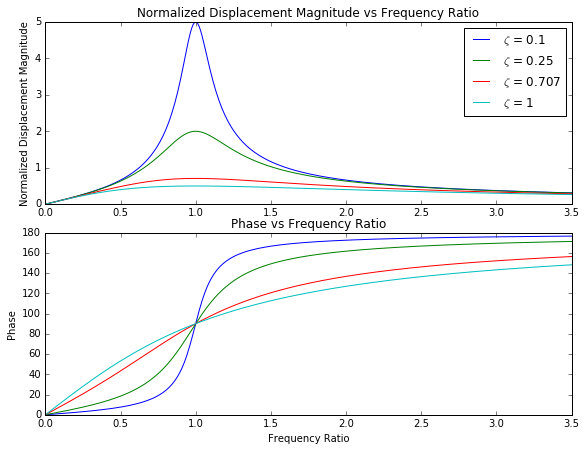

In [4]:
rotating_unbalance(m=1, m0=0.5, e=0.1, zs=[0.1, 0.25, 0.707, 1], rmin=0, rmax=3.5, normalized=True)

Podemos ainda utilizar a interatividade disponível no notebook para avaliar a influência dos paramêtros.

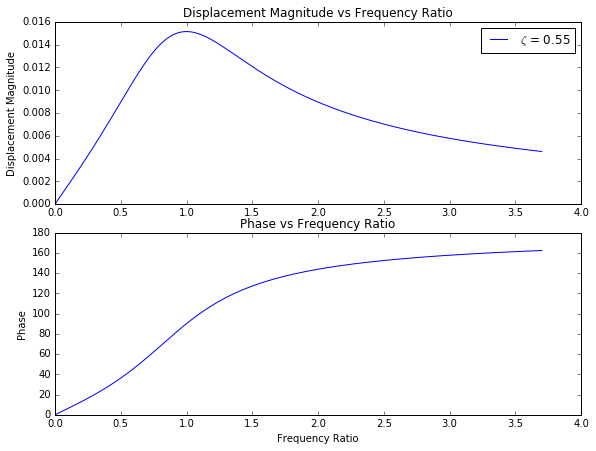

In [5]:
interact(rotating_unbalance, m=1, m0=0.5, e=0.1, zs=(0.1,1), rmin=0, rmax=3.5, normalized=True)